In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd 


# Loading data


In [2]:
imageSize = 256
batchSize = 32
channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'tomatoPlantVillage',
    shuffle=True,
    image_size = (imageSize,imageSize),
    batch_size = batchSize,
)


Found 16011 files belonging to 10 classes.


In [4]:
dataset.class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
class_names = dataset.class_names

In [6]:
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
len(dataset)

501

2023-06-02 12:53:20.183728: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16011]
	 [[{{node Placeholder/_4}}]]
2023-06-02 12:53:20.184300: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16011]
	 [[{{node Placeholder/_0}}]]


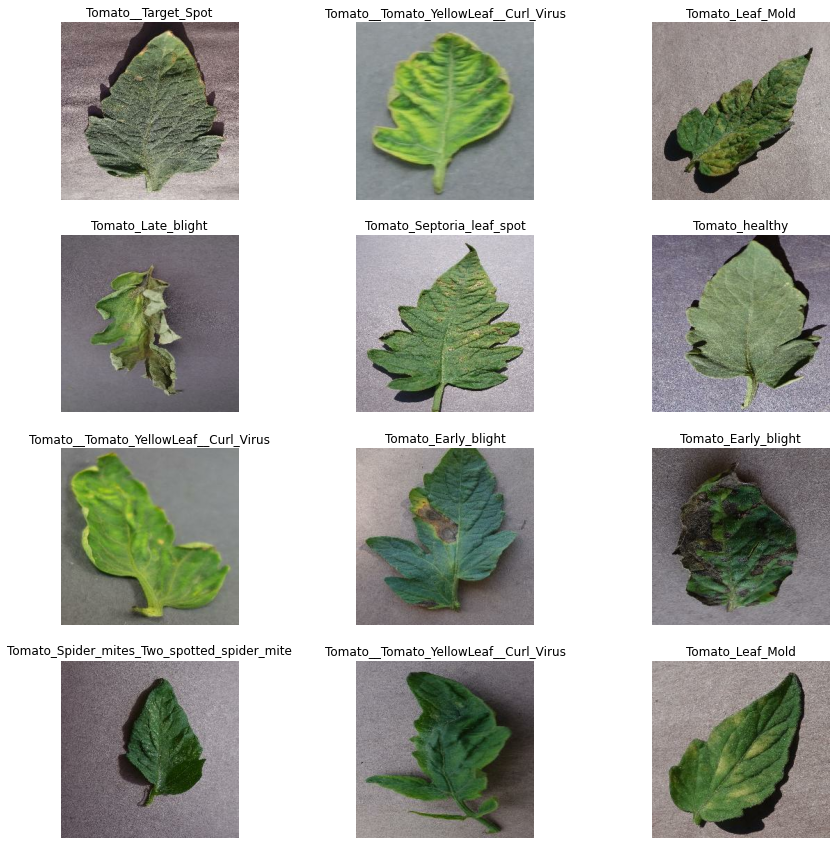

In [8]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

# splitting the data
here we will use 80% of data for trianing and 10% for validation and other 10% for testing

In [9]:
train_size = 0.8
eightyofdataset = len(dataset)*train_size
eightyofdataset

400.8

In [10]:
len(dataset)

501

In [11]:
train_ds = dataset.take(int(eightyofdataset))
len(train_ds)

400

In [12]:
test_ds = dataset.skip(int(eightyofdataset))
len(test_ds)

101

In [13]:
validation_size = 0.1;
tenofdataset = len(dataset)*validation_size
tenofdataset

50.1

In [14]:
val_ds = test_ds.take(int(tenofdataset))
len(val_ds)

50

In [15]:
test_ds = test_ds.skip(int(tenofdataset))
len(test_ds)

51

# Making essential layers

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imageSize,imageSize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Building model

In [18]:
n_classes = 10
input_shape = (batchSize,256,256,channels)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])


In [19]:
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 128, 128, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 64, 64, 32)          0         
 g2D)                                                 

In [20]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# informatoin.history will return a dictionary containing loss, accuracy , validation_loss and validation_accuracy of these 40 epochs trainning iterations

In [21]:
information = model.fit(
    train_ds,
    epochs=30,
    batch_size=batchSize,
    verbose=1,
    validation_data = val_ds
)


Epoch 1/30


2023-06-02 12:54:06.585086: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16011]
	 [[{{node Placeholder/_4}}]]
2023-06-02 12:54:06.585419: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16011]
	 [[{{node Placeholder/_4}}]]


400/400 [==============================] - ETA: 0s - loss: 1.8560 - accuracy: 0.3240

2023-06-02 12:56:55.406875: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16011]
	 [[{{node Placeholder/_4}}]]
2023-06-02 12:56:55.407028: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16011]
	 [[{{node Placeholder/_0}}]]


400/400 [==============================] - 177s 441ms/step - loss: 1.8560 - accuracy: 0.3240 - val_loss: 1.9243 - val_accuracy: 0.3994
Epoch 2/30
400/400 [==============================] - 188s 469ms/step - loss: 1.3820 - accuracy: 0.5017 - val_loss: 1.1672 - val_accuracy: 0.5844
Epoch 3/30
400/400 [==============================] - 206s 514ms/step - loss: 0.9171 - accuracy: 0.6744 - val_loss: 1.6697 - val_accuracy: 0.5756
Epoch 4/30
400/400 [==============================] - 189s 472ms/step - loss: 0.6459 - accuracy: 0.7709 - val_loss: 0.6346 - val_accuracy: 0.7844
Epoch 5/30
400/400 [==============================] - 192s 480ms/step - loss: 0.5748 - accuracy: 0.7994 - val_loss: 0.6958 - val_accuracy: 0.7663
Epoch 6/30
400/400 [==============================] - 194s 486ms/step - loss: 0.4612 - accuracy: 0.8369 - val_loss: 0.8436 - val_accuracy: 0.7487
Epoch 7/30
400/400 [==============================] - 194s 484ms/step - loss: 0.4118 - accuracy: 0.8553 - val_loss: 0.8598 - val_accura

In [22]:
information.history

{'loss': [1.8559819459915161,
  1.3819836378097534,
  0.9170859456062317,
  0.645876944065094,
  0.5748006701469421,
  0.4612102210521698,
  0.4118008017539978,
  0.3795265853404999,
  0.35452309250831604,
  0.3162756562232971,
  0.27563410997390747,
  0.26832401752471924,
  0.25296664237976074,
  0.24383679032325745,
  0.22659218311309814,
  0.21606552600860596,
  0.20639005303382874,
  0.19446837902069092,
  0.1841273456811905,
  0.18590758740901947,
  0.1697758287191391,
  0.15067005157470703,
  0.1543247103691101,
  0.15424112975597382,
  0.159935861825943,
  0.1579785794019699,
  0.14046981930732727,
  0.14449986815452576,
  0.12632787227630615,
  0.1305536925792694],
 'accuracy': [0.32398438453674316,
  0.5017187595367432,
  0.6743749976158142,
  0.7708593606948853,
  0.7993749976158142,
  0.8368750214576721,
  0.8553125262260437,
  0.8619531393051147,
  0.876953125,
  0.8862500190734863,
  0.9024999737739563,
  0.9064843654632568,
  0.9100000262260437,
  0.9155468940734863,
  0.

In [23]:
information.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
loss = information.history['loss']
accuracy = information.history['accuracy']
val_loss = information.history['val_loss']
val_accuracy = information.history['val_accuracy']

Text(0.5, 1.0, 'Training vs Validation accuracy')

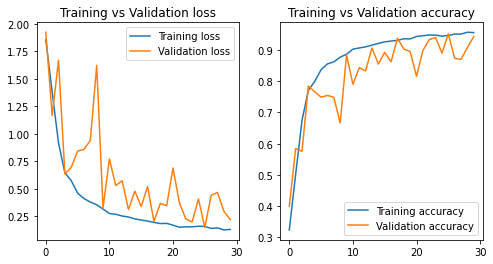

In [25]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(range(30),loss,label='Training loss')
plt.plot(range(30),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation loss')

plt.subplot(1,2,2)
plt.plot(range(30),accuracy,label='Training accuracy')
plt.plot(range(30),val_accuracy,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation accuracy')

2023-06-02 15:02:18.828007: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16011]
	 [[{{node Placeholder/_4}}]]
2023-06-02 15:02:18.828656: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16011]
	 [[{{node Placeholder/_0}}]]


First image to predict
Actual label:  Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 0s 173ms/step
Predicted label:  Tomato_Bacterial_spot


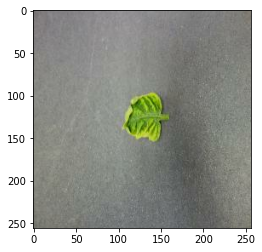

In [26]:
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[i].numpy().astype('uint8')
    first_label = labels_batch[i].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])
    
    batch_predictions = model.predict(image_batch)
    print("Predicted label: ",class_names[np.argmax(batch_predictions[0])])
    

In [28]:
def predict(mode,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence
    

2023-06-02 15:02:26.761990: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [16011]
	 [[{{node Placeholder/_0}}]]
2023-06-02 15:02:26.762597: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [16011]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 13ms/step


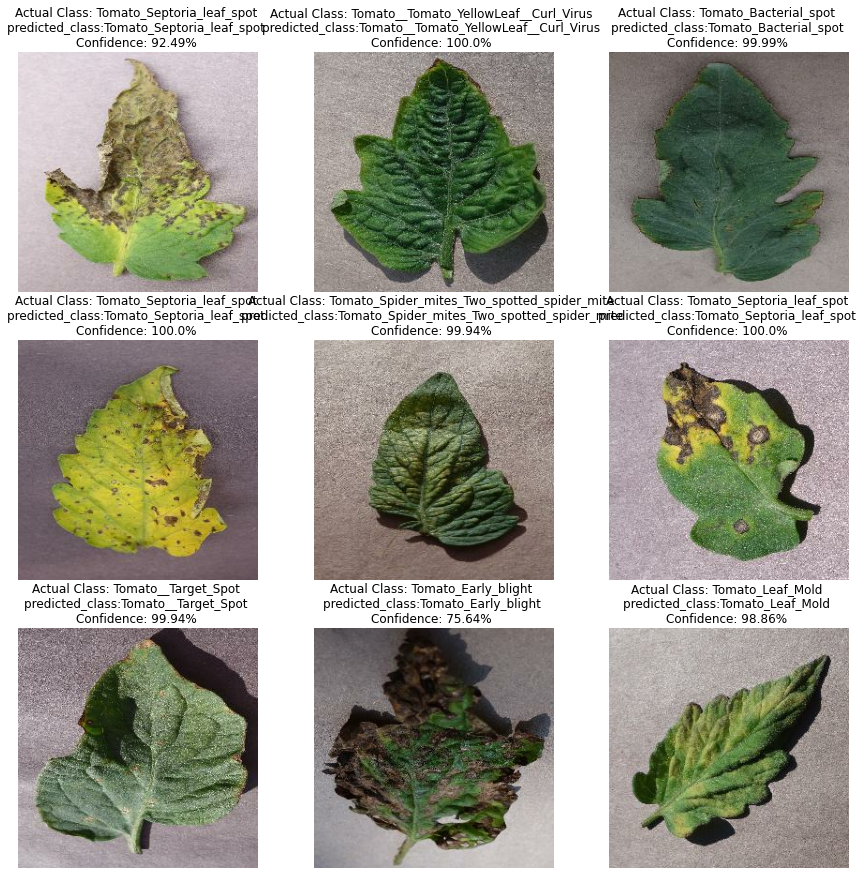

In [29]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual Class: {actual_class} \npredicted_class:{predicted_class} \nConfidence: {confidence}% ")
        
        plt.axis('off')

In [30]:
model_version = "version-2"
model.save(f"saved_models/{model_version}")

INFO:tensorflow:Assets written to: saved_models/version-2/assets


INFO:tensorflow:Assets written to: saved_models/version-2/assets
